# Import Libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import pickle

In [38]:
# list of dates
date_list = ['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']

# Read in dataset
df_train = pd.read_csv("G:\\virtual experience\\BCG\\ml_case_training_data(1).csv", parse_dates=date_list)
df_hist = pd.read_csv("G:\\virtual experience\\BCG\\ml_case_training_hist_data(1).csv", parse_dates=['price_date'])
df_out = pd.read_csv("G:\\virtual experience\\BCG\\ml_case_training_output(1).csv")

In [13]:
df_train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [14]:
df_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


# Trying to do some feature engineering

Tenure of customer activity:
Ending date - Active date

In [34]:
df_train.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [35]:
df_train.loc[df_train["date_end"].isnull(),"date_end"] = df_train["date_end"].value_counts().index[0]


In [36]:
df_train["tenure"] = ((df_train["date_end"]-df_train["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

In [39]:
df_train_merged = df_train.merge(right=df_out,on=['id'])
df_train_merged.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,tenure,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,...,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,3,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,3,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,...,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,7,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,...,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,6,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,...,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,6,0


In [40]:
tenure = df_train_merged[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

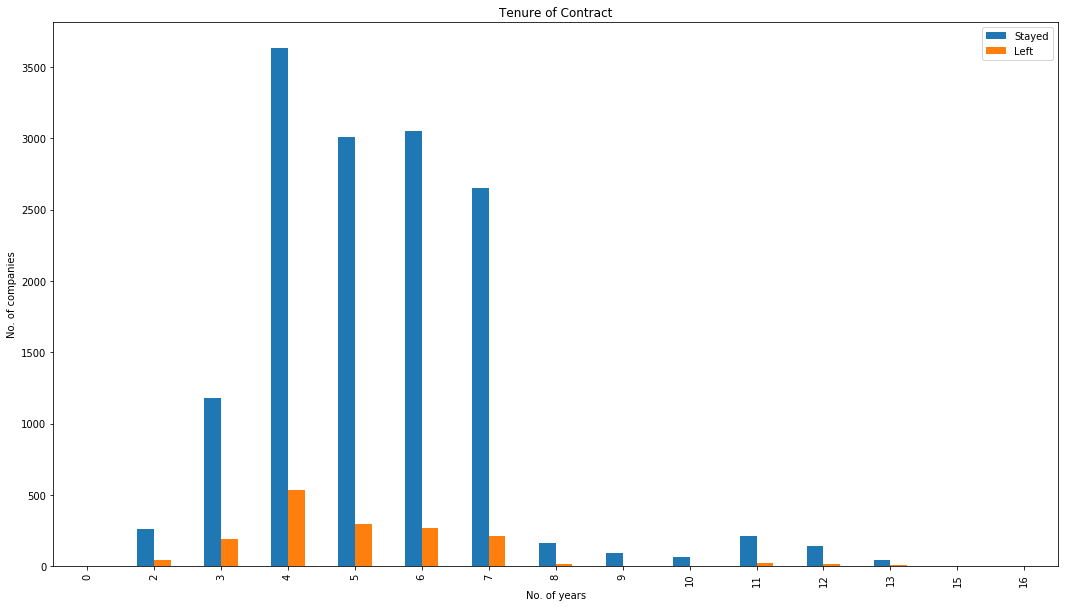

In [42]:
tenure.plot(kind="bar",
            figsize=(18,10),
            title= "Tenure of Contract")
# Rename legend
plt.legend(["Stayed", "Left"])
# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

Obseravtion:
1) Churn rate is low for less than 2 years and for greater than 8 years, meaning churn occurs at either recent or long tenure.
2) Churn rate is higher around 3-7 years of tenure, with highest churn and retention occuring at around 4 years.
